<a href="https://colab.research.google.com/github/LeyanTang/ds1002-gnv2nh/blob/main/lab1-ftx-stock-pricing-gnv2nh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1: Python

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. Bankman-Fried was recently found guilty on seven counts of fraud and conspiracy.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code. Point assignments are indicated for each section. There are 15 total points possible for this lab, which counts as 5% of your overall grade. There is a 1-point extra credit option at the end.

Useful reference material:
- [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook.
- [Charts Reference](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/charts-in-colaboratory.ipynb) notebook.
- [Plots Walkthrough](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [25]:
# List group members (if applicable). Identify names and computing IDs
# Individual: Leyan Tang (gnv2nh)

## 1. Load Libraries & Data (3 pts)

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. Resolve any import issues you need to.

In [43]:
import pandas as pd

url = "https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv"
df = pd.read_csv(url, sep=';')

df = df.reset_index(drop=True)

date_columns = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'timestamp']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

df.head()

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2022-12-31 00:00:00+00:00,2022-12-31 23:59:59.999000+00:00,2022-12-31 15:23:00+00:00,2022-12-31 00:21:00+00:00,0.838968,0.853502,0.835226,0.842688,3001502.06,2.771561e+08,2022-12-31 23:59:59.999000+00:00
1,2022-12-30 00:00:00+00:00,2022-12-30 23:59:59.999000+00:00,2022-12-30 04:22:00+00:00,2022-12-30 15:12:00+00:00,0.860193,0.864752,0.826643,0.839048,3608615.07,2.759588e+08,2022-12-30 23:59:59.999000+00:00
2,2022-12-29 00:00:00+00:00,2022-12-29 23:59:59.999000+00:00,2022-12-29 00:49:00+00:00,2022-12-29 21:03:00+00:00,0.885723,0.887118,0.843029,0.860231,3766979.57,2.829258e+08,2022-12-29 23:59:59.999000+00:00
3,2022-12-28 00:00:00+00:00,2022-12-28 23:59:59.999000+00:00,2022-12-28 00:20:00+00:00,2022-12-28 10:44:00+00:00,0.921162,0.925702,0.869842,0.886091,4192949.85,2.914310e+08,2022-12-28 23:59:59.999000+00:00
4,2022-12-27 00:00:00+00:00,2022-12-27 23:59:59.999000+00:00,2022-12-27 14:19:00+00:00,2022-12-27 19:12:00+00:00,0.931138,0.955402,0.916414,0.923668,4574953.05,3.037898e+08,2022-12-27 23:59:59.999000+00:00


## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [44]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 741
Number of columns: 11


## 3. Clean and Organize the Data (3 pts)

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`,



In [46]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.date
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

columns_to_drop = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
df = df.drop(columns=columns_to_drop)

df.to_csv('cleaned_data.csv')

Now display the first 10 rows of the cleaned dataset.

In [47]:
df.head(10)

,open,high,low,close,volume
timestamp,,,,,
2021-01-03,6.201133,7.007523,6.171834,6.923968,3.104665e+07
2021-01-04,6.948680,7.632146,6.358218,7.514079,4.052611e+07
2021-01-05,7.528216,8.714947,7.081120,8.664688,4.947928e+07
2021-01-06,8.671285,9.390797,8.425946,9.390797,3.140463e+07
2021-01-07,9.386493,10.004872,9.215244,9.562131,4.630334e+07
2021-01-08,9.569239,9.726429,8.452265,9.380988,4.228627e+07
2021-01-09,9.370450,9.636120,8.728044,9.570511,2.849895e+07
2021-01-10,9.571917,9.944797,8.657147,9.308809,3.101239e+07
2021-01-11,9.298315,9.298315,7.126050,8.610997,1.013024e+08


In [48]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 727
Number of columns: 5


## 4. Calculate Daily Gains/Losses (2 pts)

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Reference code for this is available in the [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook. Hint: It is not complicated and does not require a for-loop.

In [49]:
df['close_change'] = df['close'] - df['close'].shift(1)
df.head()

,open,high,low,close,volume,close_change
timestamp,,,,,,
2021-01-03,6.201133,7.007523,6.171834,6.923968,31046652.87,NaN
2021-01-04,6.948680,7.632146,6.358218,7.514079,40526109.15,0.590111
2021-01-05,7.528216,8.714947,7.081120,8.664688,49479278.39,1.150608
2021-01-06,8.671285,9.390797,8.425946,9.390797,31404627.93,0.726110
2021-01-07,9.386493,10.004872,9.215244,9.562131,46303336.73,0.171334


## 5. Identify Growth Days (1 pt)

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [51]:
top_10_positive_growth = df[df['close_change'] > 0].nlargest(10, 'close_change')

top_10_positive_growth_formatted = top_10_positive_growth[['close_change']].rename(columns={'close_change': 'Rate of Change'})
top_10_positive_growth_formatted.index = top_10_positive_growth.index
print(top_10_positive_growth_formatted)

            Rate of Change
timestamp                 
2021-09-01       16.677156
2021-09-06        9.800320
2021-02-19        8.335900
2021-05-24        6.333923
2021-03-09        5.529699
2021-08-09        5.325192
2021-09-08        5.239728
2021-04-26        4.504385
2021-05-05        4.488174
2022-02-28        4.401841


## 6. Calculate the % Rate of Change (2 pts)

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [52]:
df['rate_of_change'] = df['close'].pct_change()

## 7. Identify Greatest % Change Days (1 pt)

Based on the rate change column calculated above, identify the top 5 days of greatest rate changes, whether positive or negative.

Display your results in a table showing both the rate of change and their dates.

In [54]:
top_5_absolute_rate_changes = df['rate_of_change'].abs().nlargest(5)

print(df.loc[top_5_absolute_rate_changes.index][['rate_of_change']])

            rate_of_change
timestamp                 
2022-11-08       -0.750752
2022-11-09       -0.583137
2022-11-10        0.528686
2021-09-01        0.343825
2021-02-19        0.317665


## 8. Plot the Data (2 pts)

Finally, create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

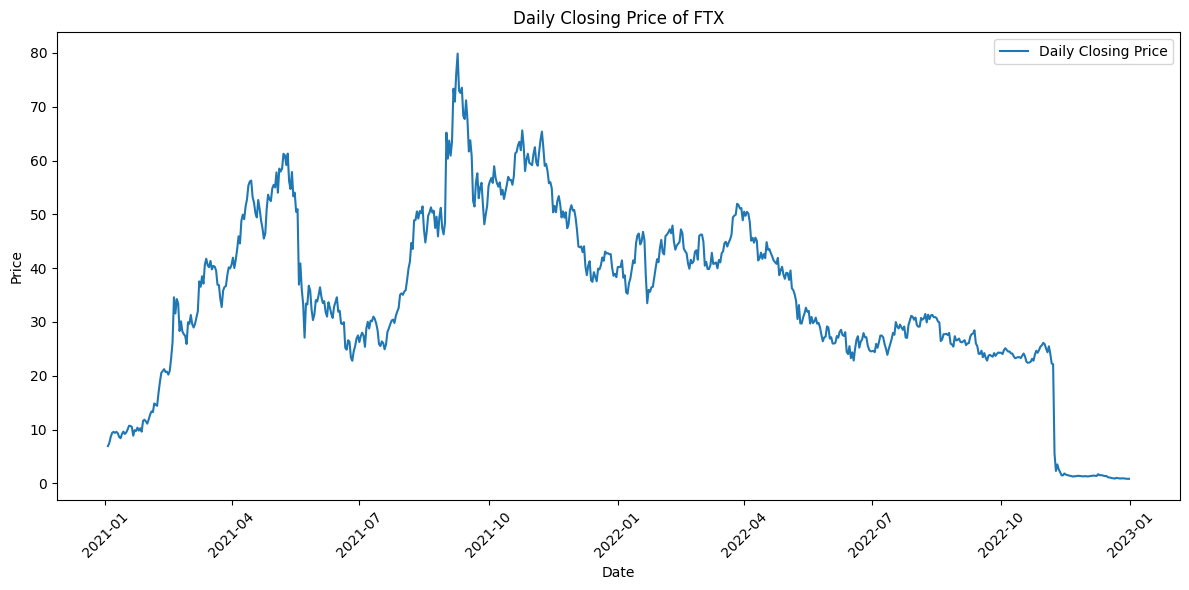

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], color='tab:blue', label='Daily Closing Price', linestyle='-')
plt.title('Daily Closing Price of FTX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

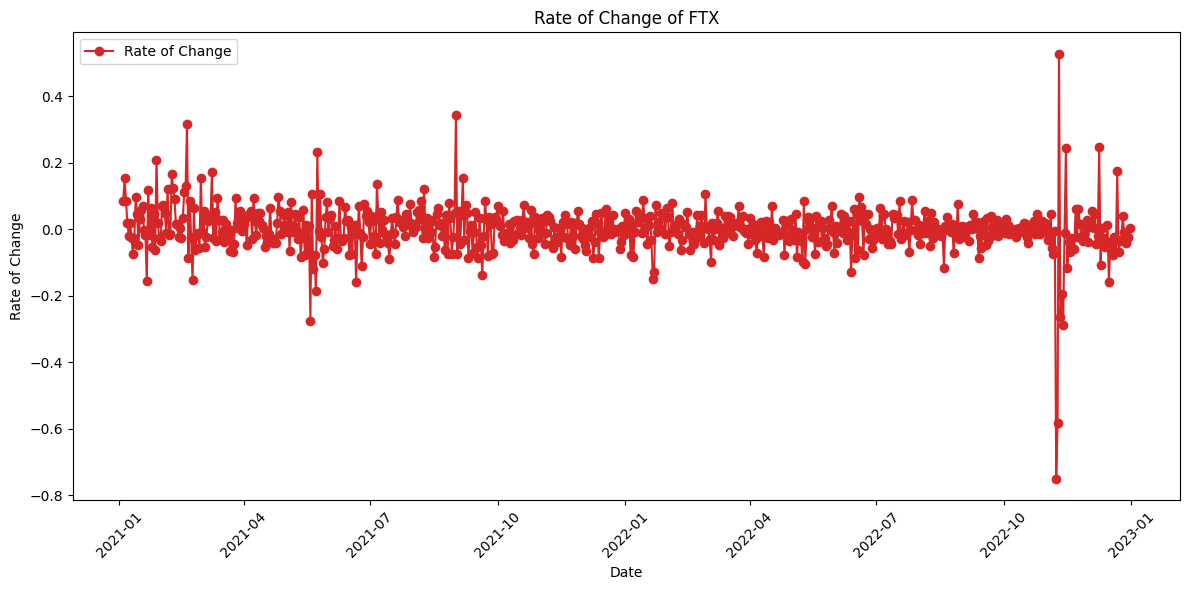

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rate_of_change'], color='tab:red', label='Rate of Change', linestyle='-', marker='o')
plt.title('Rate of Change of FTX')
plt.xlabel('Date')
plt.ylabel('Rate of Change')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## BONUS! (1 pt)

Combine the two plots from #8 above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

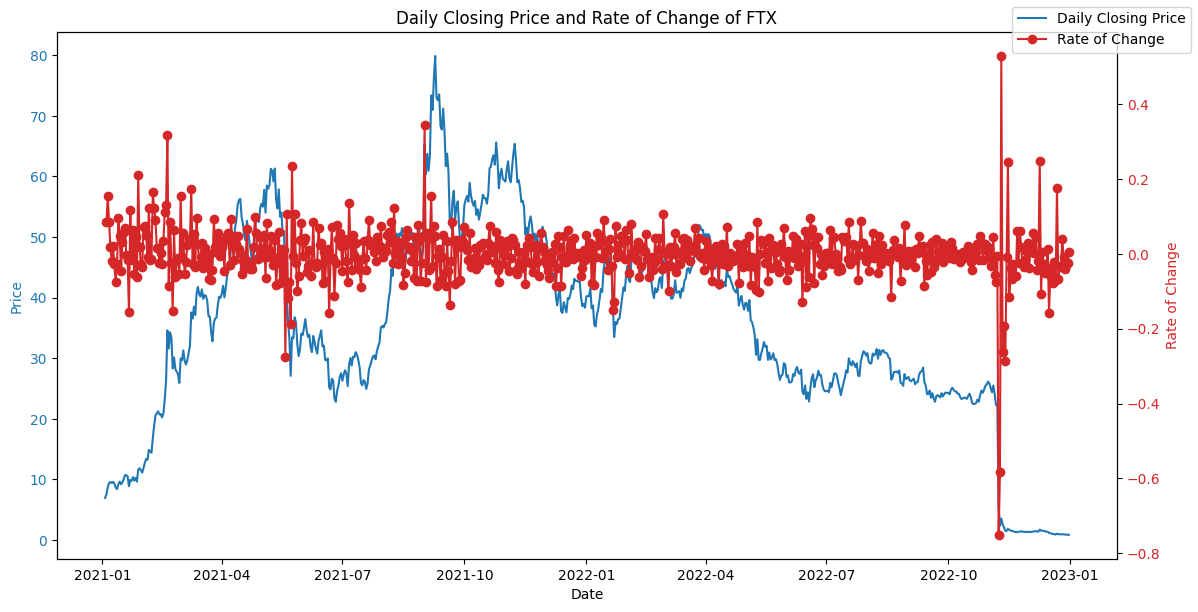

In [68]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color)
ax1.plot(df.index, df['close'], color=color, label='Daily Closing Price', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Rate of Change', color=color)
ax2.plot(df.index, df['rate_of_change'], color=color, label='Rate of Change', linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc="upper right")
plt.title('Daily Closing Price and Rate of Change of FTX')
plt.show()